Step 1:   
Alternate Hypothesis(bold statement) 
Null Hypothesis(soft statement)  

Step 2:   
Now We will take a sample of 20 data and calculate sample mean   

Step 3:   
Calculate t test value    

Step 4:   
Decide significance level alpha value    

Step 5:    
Perform 1 tail or 2 tail test, then compute t value based on which accept H1 or reject H0

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [20]:
from scipy.stats import t

In [21]:
#one tail test
alpha=1-0.95
t_critical=t.ppf(1-alpha,df=19)
print(t_critical)

1.729132811521367


In [22]:
#two tail test
alpha=1-0.95
t_critical=t.ppf(1-alpha/2,df=19)
print(t_critical)

2.093024054408263


In [23]:
#t test
def t_score(sample_mean,pop_mean,sample_sd,sample_size):
    numerator=sample_mean-pop_mean
    denominator=sample_sd/ (sample_size**0.5)
    return numerator/denominator

Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

identify null hypothesis and alternate hypothesis

In [4]:
# H0 = 500gm
# H1 != 500gm

Calculate sample mean and sample standard deviation

In [24]:
l=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
sample_mean=sum(l)/len(l)
sample_mean

465.3

sample sd=(E(observation-sample mean) **2 / (sample size-1)) ** 0.5

In [25]:
l=[490, 220, 470, 500, 495, 496, 496, 498, 508, 480]
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

86.84859110991827

Calculate alpha value and t_critical value

In [26]:
from scipy.stats import t

In [27]:
#we perform 2 tail test as H1 != 500gm
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [28]:
#df=degree of freedom=n-1   here n(sample size) is 10
t_critical=t.ppf(1-alpha/2,df=9)
t_critical

2.2621571627409915

Calculate t value

In [29]:
sample_mean=465.3
pop_mean=500
sample_sd=86.84859110991827
sample_size=10

In [30]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

-1.2634751284446715

In [31]:
if(np.abs(t) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [32]:
p_value = 2 * (1.0 - norm.cdf(np.abs(t)))

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.20641847943818092
Fail to reject Null Hypothesis


Text(465.3, 0.0007, 'x_bar')

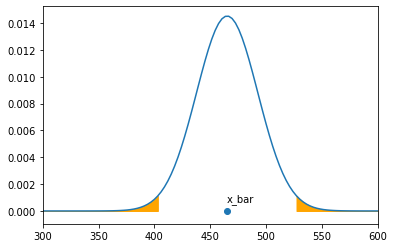

In [33]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 300
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = sample_mean
std = sample_sd / sample_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = sample_mean + (-t_critical * std)
t_critical_right = sample_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.0007))


# In this case sample mean falls in the rejection region
# i.e. here we reject the Null Hypothesis

Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

In [44]:
# H0 <= 4
# H1 > 4

In [45]:
l=[4,5,4,4,4,4,3.5,4.5,5,4,4,4.5,4,4,4.5,4,4,5,5,4]
sample_mean=sum(l)/len(l)
sample_mean

4.25

In [46]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

0.4442616583193193

In [47]:
from scipy.stats import t

In [48]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [49]:
t_critical=t.ppf(1-alpha,df=19)
print(t_critical)

1.729132811521367


In [50]:
sample_size = 20
sample_mean = 4.25
pop_mean = 4
sample_sd = 0.4442616583193193

In [51]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

2.516611478423583

In [52]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

In [ ]:
# H0 <= 15
# H1 > 15

In [57]:
l=[14.08,14.13,15.65,13.78,16.26,14.97,15.36,15.81,14.53,16.79,15.78,16.98,13.23,15.43,15.46,13.88,14.31,14.41,15.76,15.38]
sample_mean=sum(l)/len(l)
sample_mean

15.098999999999998

In [58]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

1.0253671999517255

In [59]:
from scipy.stats import t

In [60]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [61]:
t_critical=t.ppf(1-alpha,df=19)
print(t_critical)

1.729132811521367


In [62]:
sample_size = 20
sample_mean = 15.098999999999998
pop_mean = 15
sample_sd = 1.0253671999517255

In [63]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

0.4317882018907916

In [64]:
if(t > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

In [86]:
# H0 >= 100
# H1 < 100

In [87]:
l=[98,100,94,98,100,95]
sample_mean=sum(l)/len(l)
sample_mean

97.5

In [88]:
new=[]
for i in l:
    new.append((i-sample_mean)**2)

numerator=0
for i in range(0,len(new)):
    numerator=numerator+new[i]

denominator=len(new)-1

sample_sd=(numerator/denominator)**0.5
sample_sd

2.5099800796022267

In [89]:
from scipy.stats import t

In [90]:
confidence_level=0.95
alpha=1-confidence_level
alpha

0.050000000000000044

In [91]:
#As it is left one tail test
t_critical=t.ppf(1-alpha,df=5)
t_critical=-t_critical
print(t_critical)

-2.015048372669157


In [92]:
sample_size = 6
sample_mean = 97.5
pop_mean = 100
sample_sd = 2.5099800796022267

In [93]:
t=t_score(sample_mean,pop_mean,sample_sd,sample_size)
t

-2.439750182371333

In [94]:
if(t < t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis
